<a href="https://colab.research.google.com/github/VilarimLucas/k-means/blob/main/miniprojeto_01_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = {
    'Estado': ['São Paulo', 'Rio de Janeiro', 'Minas Gerais', 'Bahia', 'Paraná', 'Rio Grande do Sul', 'Santa Catarina', 'Pernambuco', 'Ceará', 'Pará'],
    'Densidade_Populacional': [166.23, 365.23, 34.27, 24.71, 55.2, 40.16, 79.8, 98.34, 60.47, 8.19]
}
df = pd.DataFrame(data)

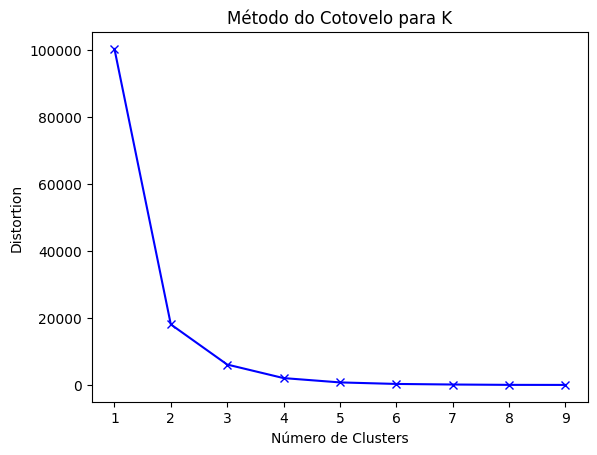

In [3]:
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df[['Densidade_Populacional']])
    distortions.append(kmeans.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Distortion')
plt.title('Método do Cotovelo para K')
plt.show()

In [4]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['Densidade_Populacional']])
df['Cluster'] = kmeans.labels_

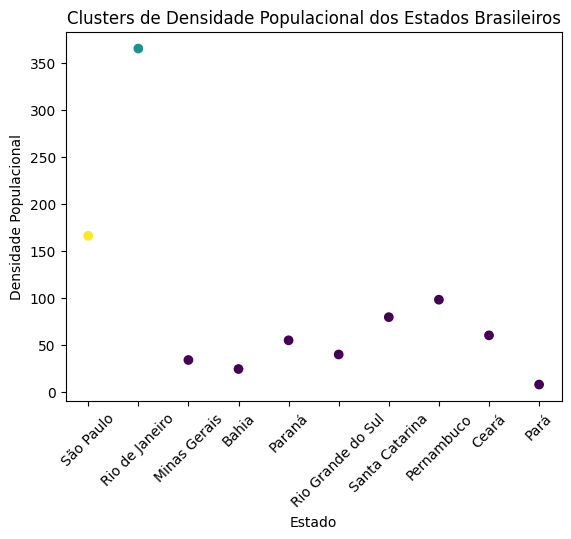

In [5]:
plt.scatter(df['Estado'], df['Densidade_Populacional'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Estado')
plt.ylabel('Densidade Populacional')
plt.title('Clusters de Densidade Populacional dos Estados Brasileiros')
plt.xticks(rotation=45)
plt.show()